In [2]:
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/MX12401194QV01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,3000BA70-48F8-4A15-9310-0D304610A208,0.010000,1.785163,040201D,OI0QQZN7,NaN
1,3000BA70-48F8-4A15-9310-0D304610A208,0.020000,2.700342,040201D,OI0QQZN7,91.517854
2,3000BA70-48F8-4A15-9310-0D304610A208,0.030000,2.542163,040201D,OI0QQZN7,-15.817901
3,3000BA70-48F8-4A15-9310-0D304610A208,0.039933,2.373815,040201D,OI0QQZN7,-16.947751
4,3000BA70-48F8-4A15-9310-0D304610A208,0.040000,2.372685,040201D,OI0QQZN7,-16.947751
...,...,...,...,...,...,...
462,7343B3D0-D70B-4FB7-97C2-576AD8C728B9,0.918467,13.724515,040201D,OI0QQXY3,4.212376
463,7343B3D0-D70B-4FB7-97C2-576AD8C728B9,0.921667,13.738977,040201D,OI0QQXY3,4.519400
464,7343B3D0-D70B-4FB7-97C2-576AD8C728B9,0.958400,13.857837,040201D,OI0QQXY3,3.235759
465,7343B3D0-D70B-4FB7-97C2-576AD8C728B9,0.990000,13.953648,040201D,OI0QQXY3,3.032003


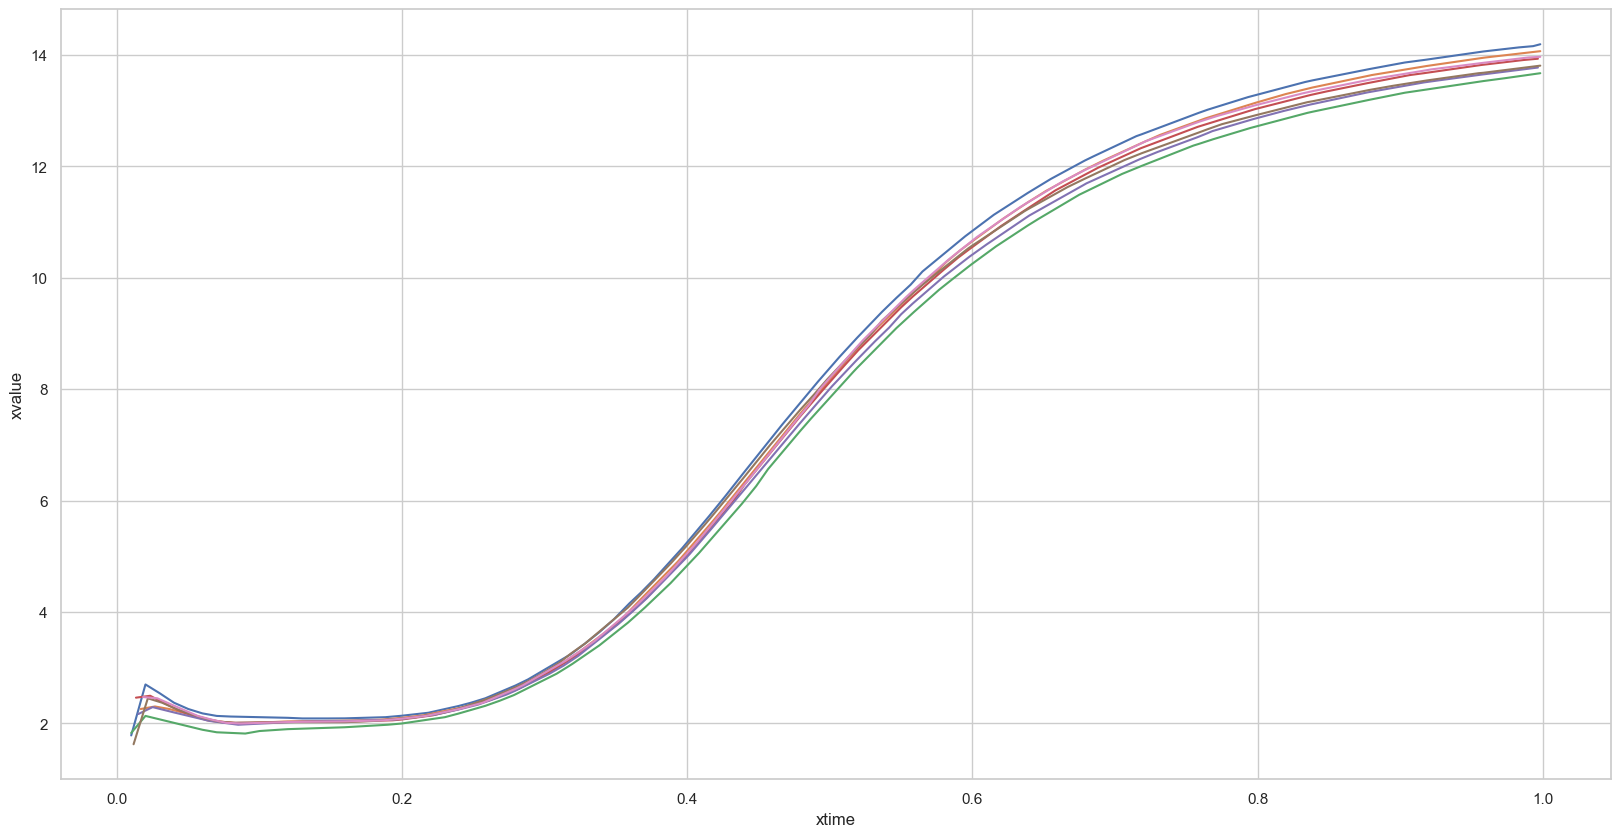

In [4]:
dessiner_commande(df)

## Analyse des pentes

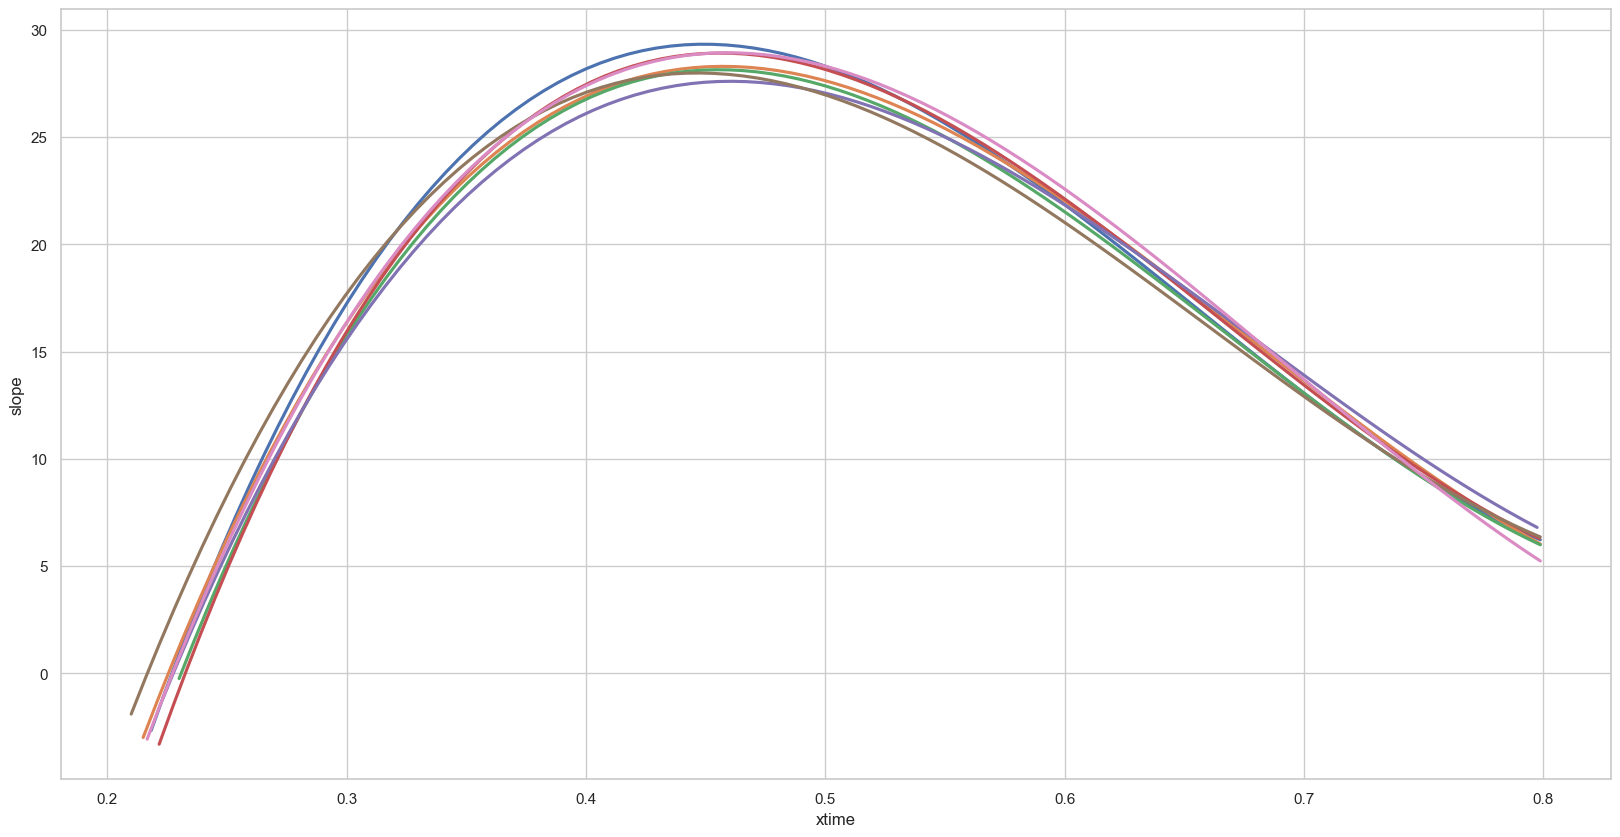

In [6]:
dessiner_commande_slope(df_02_08, 3 ,unified=False)

In [9]:
for sample in df_02_08['Sample_Code'].unique():
    df_sample = df_02_08[df_02_08['Sample_Code'] == sample]

    z1 = np.polyfit(df_sample['xtime'], df_sample['slope'], 3)
    p1 = np.poly1d(z1)

    # Update the 'fitted_slope' in df_data for the current sample
    df_02_08.loc[df_02_08['Sample_Code'] == sample, 'fitted_slope'] = p1(df_sample['xtime'])
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_sample_xtime

Batch
040201D    0.439267
040201D    0.478400
040201D    0.445000
040201D    0.456667
040201D    0.440000
040201D    0.439267
040201D    0.439267
Name: xtime, dtype: float64

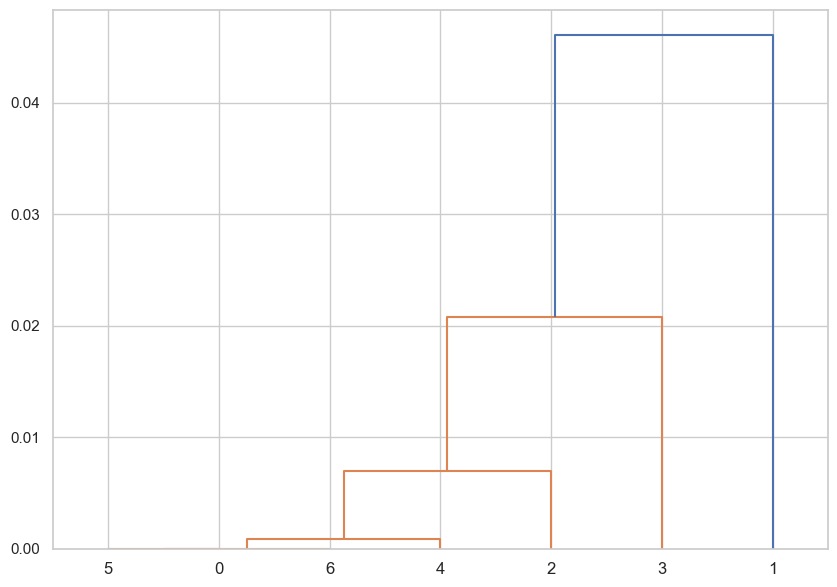

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Reshape your data to a 2D array
data = np.array(max_slope_sample_xtime).reshape(-1, 1)

# Generate the links between the clusters
linked = linkage(data, 'ward')

# Create a new plot
plt.figure(figsize=(10, 7))

# Draw the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Show the plot
plt.show()

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Générer les liens entre les clusters
linked = linkage(np.array(max_slope_sample_xtime).reshape(-1,1), 'ward')

# Utiliser fcluster pour créer des clusters en fonction du nombre de clusters désiré
clusters = fcluster(linked, 2, criterion='maxclust')

# Compter le nombre de valeurs dans chaque cluster
counts = np.bincount(clusters)

In [12]:
clusters

array([1, 2, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
np.array(max_slope_sample_xtime)

array([0.43926667, 0.4784    , 0.445     , 0.45666667, 0.44      ,
       0.43926667, 0.43926667])